## 逻辑回归（Logistic Regression)

### 基本原理

在上一节中我们知道，线性回归可以表示为
$$ y = \mathbf{w}^\mathsf{T}\mathbf{x}  + b$$
对于回归问题，输出的是一个连续值，但是实际上对于分类问题，特别是二分类问题，输出的是离散的值，通常是 $y \in \{0, 1\}$，1表示正例，0表示反例。

例如，给定一些学生的成绩，$x = [20, 30, 40, 50, 70, 80, 90, 100]$，如果大于等于60分及格，则对应的输出是，$y = [0, 0, 0, 0, 1, 1, 1, 1]$。对于这个问题，显然用 `Heaviside` 函数可以很好的表示。
$$
    \begin{aligned}
    H(x) = 1, \quad x \ge 60 \\
    H(x) = 0, \quad x < 60
    \end{aligned}
$$

但是这个函数是间断的，不可导。幸运的是存在另一个可导的函数来表示，这就是 `sigmoid` 函数。
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

容易求得 `sigmoid` 函数的导数
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x) )
$$

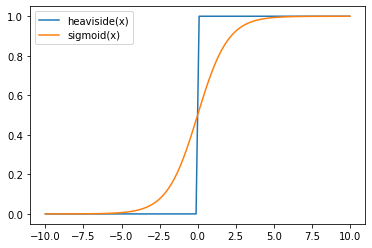

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def heaviside(x):
    return np.select([x >= 0, x < 0], [1, 0])

x = np.linspace(-10, 10, 100)
h = heaviside(x)
s = sigmoid(x)

plt.plot(x, h, label="heaviside(x)")
plt.plot(x, s, label="sigmoid(x)")
plt.legend()

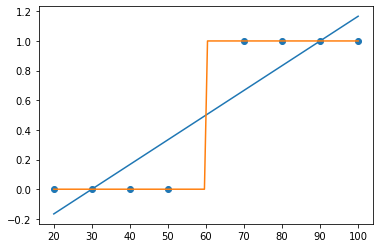

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
x = [20,30,40,50,70,80,90,100]
y = [0,0,0,0,1,1,1,1]
plt.scatter(x, y)
lr = LinearRegression().fit(np.array(x).reshape(-1,1),np.array(y))
clr = LogisticRegression().fit(np.array(x).reshape(-1,1),np.array(y))
x_test = np.array([[20], [100]])
y_pred = lr.predict(x_test)
x_test_logit = np.linspace(20, 100, 100).reshape(-1,1)
y_pred_logit = clr.predict(x_test_logit)
plt.plot(x_test, y_pred)
plt.plot(x_test_logit, y_pred_logit)

### 逻辑回归模型

对于线性回归，假设 $\hat{y} = \mathrm{w}^\mathsf{T} \mathrm{x} +b$，其输出范围是所有实数的集合。

而对于Logistic回归，我们假设 
$$\hat{y} = \sigma(\mathrm{w}^\mathsf{T} \mathrm{x} + b)  = \frac{1}{1 + e^{-(\mathrm{w}^\mathsf{T} \mathrm{x} + b)}}$$
它的输出范围在0到1之间，因为通过应用 `sigmoid` 函数，总是输出一个在0到1之间的数字。这个值可以理解为 $y$ 的后验概率。

设正例 $y = 1$的后验概率为
$$
\mathrm{P}(y=1 \mid \mathrm{x}) = \hat{y} = \frac{1}{1 + e^{-(\mathrm{w}^\mathsf{T} \mathrm{x} + b)}}
$$
则反例 $y=0$的后验概率为：
$$
\mathrm{P}(y=0 \mid \mathrm{x}) =  1 - \hat{y} =  \frac{e^{-(\mathrm{w}^\mathsf{T} \mathrm{x} + b)}}{1 + e^{-(\mathrm{w}^\mathsf{T} \mathrm{x} + b)}}
$$

将上述两式变换之后，容易得到
$$
\mathrm{w}^\mathsf{T} \mathrm{x} + b = \log \frac{\mathrm{P}(y=1 \mid \mathrm{x})}{\mathrm{P}(y=0 \mid \mathrm{x})}
$$

上式中等号右边 $\log \frac{p(y=1 \mid \mathrm{x})}{p(y=0 \mid \mathrm{x})}$为样本 $\mathrm{x}$ 为正反例后验概率的比值的对数，通常称为对数几率（Log Odds或者Logit)。而等号左边是线性函数，所以`Logistic`回归是一种线性回归模型，称为对数几率回归(Logit Regression)。

对于任意一个样本 $(\mathrm{x}, y)$，其后验概率为
$$
 \mathrm{P}(y \mid \mathrm{x}) = \big( \hat{y} \big)^{y} \big(1-\hat{y}\big)^{1-y}
$$

考虑样本集中的所有样本点，由于每个样本之间相互独立，因此它们的联合分布等于各自边缘分布之积，
$$
L(\mathrm{w}, b) = \prod_{i=1}^m \mathrm{P}(y^{(i)} \mid \mathrm{x}^{(i)}) = \prod_{i=1}^m \big(\hat{y}^{(i)}\big)^{y^{(i)}} \big(1-\hat{y}^{(i)}\big)^{1-y^{(i)}}
$$

这个就是似然函数。最大似然估计是通过已知结果推断出导致该结果的概率最大的参数。最大似然估计是概率论在统计学中的应用。它提供了在给定观测数据的情况下评估模型参数的方法，即“模型已确定，参数未知”，并通过多次实验观察结果。利用实验结果得到一定的参数值，可以使样本出现的概率最大化，称为最大似然估计。逻辑回归是一种监督学习。它有训练标签，即有已知结果。从这个已知结果出发，我们可以推导出能够获得最大概率的结果参数。只要我们得到这个参数，那么我们的模型自然就可以非常准确地预测未知数据。

现在问题变成找到参数 $\mathrm{w}, b$，使得 $\mathrm{x}$ 取某个值出现某个 $y$ 的概率最大。对其取对数
$$
l(\mathrm{w}, b) = \log(L(\mathrm{w}, b)) = \sum\limits_{i = 1}^{m} \Big(y^{(i)}\log \hat{y}^{(i)}\big) + (1-y^{(i)}) \log \big(1-\hat{y}^{(i)} \big) \Big)
$$

上式右边括号内一般称为交叉熵。我们定义损失函数为
$$
J(\mathrm{w}, b) = -\frac{1}{m}l(\mathrm{w}, b) = -\frac{1}{m} \sum\limits_{i = 1}^{m} \Big(y^{(i)}\log \hat{y}^{(i)}\big) + (1-y^{(i)}) \log \big(1-\hat{y}^{(i)} \big) \Big)
$$

现在的目标是找到使得损失函数最小的参数$\mathrm{w}, b$。

对损失函数$J(\mathrm{w}, b)$ 求导
$$
\begin{aligned}
&\frac{\partial J(\mathrm{w}, b)}{\partial \mathrm{w} _j} = \frac{1}{m} \sum _{i = 1}^{m} (\hat{y}^{(i)}  - y^{(i)} )\mathrm{x} _j^{(i)} \\
&\frac{\partial J(\mathrm{w}, b)}{\partial b} = \frac{1}{m} \sum _{i = 1}^{m} (\hat{y}^{(i)} - y^{(i)} )
\end{aligned}
$$ 

所以，可以得到迭代公式
$$
\begin{aligned}
& \mathrm{w}_j = \mathrm{w}_j  - \alpha \frac{\partial J(\mathrm{w}, b)}{\partial \mathrm{w}_j} \\
& b = b - \alpha \frac{\partial J(\mathrm{w}, b)}{\partial b} 
\end{aligned}
$$ 

### 实现

In [3]:
def compute_loss(y_true, y_hat):
    #交叉熵
    y1 = y_true * np.log(y_hat + 1e-9)
    y0 = (1 - y_true) * np.log(1 - y_hat + 1e-9)
    return -np.mean(y0 + y1)

In [4]:
def logistic_regression(X, y, lr = 0.001, epochs = 200): 
    # X --> 输入值 m x n
    # y --> 观测值 m x 1
    # lr --> 学习率
    # epochs --> 迭代次数

  
    # m --> 样本数目
    # n --> 特征数目
    m, n = X.shape
    
    
    #初始化权值
    w = np.random.random((n, 1))
    b = np.random.random(1)
    
    # 损失值
    losses = []
    
    for epoch in range(epochs):
        #计算预测值
        z = X@w + b
        y_hat = sigmoid(z)

        #计算梯度
        dw = (1/m)*(np.dot(X.T, (y_hat - y)))
        db = (1/m)*(np.sum(y_hat - y))
        
        #更新权值
        w = w - (lr * dw)
        b = b - (lr * db)
        
        #计算损失值
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        #每10次迭代打印一次损失值
        if epoch % 50 == 0:
            print(f'Epoch {epoch}==> Loss = {loss}')

    plt.plot(losses)
    plt.ylabel('loss')
    plt.xlabel('epoches')
    plt.title('loss reduction over time')
    
    return b, w

In [5]:
def predict_logistic(X, w, b):
    z = X@w + b
    y_hat = sigmoid(z)

    return 1 * (y_hat >= 0.5)

In [6]:
def accuracy_logistic(X, y, w, b):

    y_hat = predict_logistic(X, w, b)

    return np.sum(y == y_hat)/len(y)


Epoch 0==> Loss = 0.4590675651015794
Epoch 50==> Loss = 0.23382937349204222
Epoch 100==> Loss = 0.1669865042763481
Epoch 150==> Loss = 0.13392167956174278
Epoch 200==> Loss = 0.11364744916874873
Epoch 250==> Loss = 0.09969155340473759
prediction:
 [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
train accuracy: 1.0


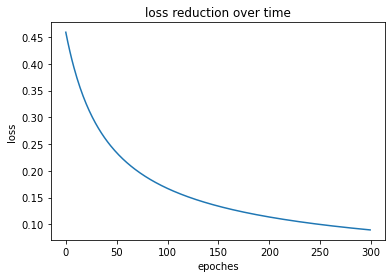

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

x = [20, 30, 40, 50, 70, 80, 90, 100]
y = [0, 0, 0, 0, 1, 1, 1, 1]

X = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

X = StandardScaler().fit_transform(X)

b, w = logistic_regression(X, y, lr=0.1, epochs=300)
y_pred = predict_logistic(X, w, b)
train_accuracy = accuracy_logistic(X, y, w, b)
print("prediction:\n", y_pred)
print(f"train accuracy: {train_accuracy}")


Epoch 0==> Loss = 7.125229556146889
Epoch 50==> Loss = 0.1544122915022356
Epoch 100==> Loss = 0.11402212663333186
Epoch 150==> Loss = 0.0983729616937573
Epoch 200==> Loss = 0.08976551455514321
Epoch 250==> Loss = 0.08416040951893244
train accuracy: 0.9824175824175824
test accuracy: 0.9385964912280702


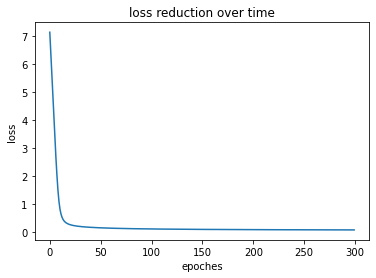

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target.reshape(-1,1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
b, w = logistic_regression(X_train, y_train, lr=0.1, epochs=300)
train_accuracy = accuracy_logistic(X_train, y_train, w, b)
test_accuracy = accuracy_logistic(X_test, y_test, w, b)

print(f"train accuracy: {train_accuracy}")
print(f"test accuracy: {test_accuracy}")

### 多分类

普通的逻辑回归模型解决了二分类问题，即 $y = \{ 0, 1 \}$。要想实现多个类别的分类，必须要改进 `Logistic` 回归，让其适应多分类问题。

关于这种改进，有两种方式可以做到。

- 第一种One-Vs-All，或者有时称为One-Vs-Rest。One-Vs-All 最为一种常用的二分类拓展方法。该方式是直接根据每个类别，都建立一个二分类器，带有这个类别的样本标记为1，带有其他类别的样本标记为0。假如我们有 $k$ 个类别，最后我们就得到了 $k$ 个针对不同标记的普通的logistic二分类器。优点：普适性还比较广，可以应用于能输出值或者概率的分类器，同时效率相对较好，有多少个类别就训练多少个分类器。缺点：很容易造成训练集样本数量的不平衡（Unbalance），尤其在类别较多的情况下，经常容易出现正类样本的数量远远不及负类样本的数量，这样就会造成分类器的偏向性。
- 第二种 One-Vs-One。一对一方法可以很好的解决One-Vs-All的问题。它的思想是这样的，从k个类别中挑出两种类别来进行学习，每次学习都可以得到一个用分类器，一共可以得到 $C(k, 2)$ 种。它在一定程度上规避了数据集 unbalance 的情况，性能相对稳定，并且需要训练的模型数虽然增多，但是每次训练时训练集的数量都降低很多，其训练效率会提高。
- 第三种方式是修改`Logistic`回归的损失函数，让其适应多分类问题。这个损失函数不再笼统地只考虑二分类非1就0的损失，而是具体考虑每个样本标记的损失。这种方法叫做 `softmax` 回归，即` Logistic` 回归的多分类版本。

### Softmax回归

`Softmax` 回归也称为多项(multinomial)多项或多类(multi-class)的`Logistic`回归，是`Logistic`回归在多分类问题的推广。

`Logistic`回归模型的输出解释为概率。类似地，我们希望将多分类模型的输出解释为概率分布。因此，我们希望模型输出一个大小为 $c$ 的向量，其中的每个值代表每种类别的概率。换句话说，向量中的第 $c$ 个值表示我们的预测是第 $c$ 类的概率。因为它们都是概率，所以它们的和等于1。

为了符合上述假设，我们使用了一个 `Softmax` 函数。简单地说，`Softmax` 函数将原始值转换为概率。`Softmax`函数是由社会科学家R. Duncan Luce于1959年在研究选择模型时发明的。下面是softmax函数的样子:

$$
y_i(\mathrm{z}) = \frac{e^{z_i}}{\sum_k e^{z_k}}
$$

其中 $\mathrm{x}$是一个向量。假设模型(例如使用多分类LDA和多分类逻辑回归等算法训练的模型)为特定的输入输出三个不同的值，例如5.0、2.5和0.5。为了将这些数字转换成概率，这些数字被输入到`softmax`函数中，那么会得到什么呢？

In [9]:
import numpy as np

x = np.array([5.0, 2.5, 0.5])
y = np.exp(x)
y /= np.sum(y)
print(y)
print(sum(y))

[0.91475073 0.07508731 0.01016196]
1.0


从上面的例子可以看到，`softmax`函数可以理解为将输出映射到一个[0,1]范围。它映射输出的方式是所有输出值的总和为1。因此，可以说`softmax`函数的输出是一个概率分布。

容易求得`Softmax`函数的导数。

当$i = j$
$$
\begin{aligned}
\frac{\partial y_i}{\partial z_j} &=\frac{e^{z_i} \sum_{k} e^{z_k}-e^{z_j} e^{z_i}}{\left(\sum_{k} e^{z_k}\right)^2} \\
&=\frac{e^{z_i}\left(\sum_{k} e^{z_k}-e^{z_j}\right)}{\left(\sum_{k} e^{z_k}\right)^2} \\
&=\frac{e^{z_j}}{\sum_{k} e^{z_k}} \times \frac{\left(\sum_{k} e^{z_k}-e^{z_j}\right)}{\sum_{k} e^{z_k}} \\
&=y_i\left(1-y_j\right)
\end{aligned}
$$
当 $i \neq j$
$$
\begin{aligned}
\frac{\partial y_i}{\partial z_j} &=\frac{0-e^{z_j} e^{z_i}}{\left(\sum_{k} e^{z_k}\right)^2} \\
&=\frac{-e^{z_j}}{\sum_{k} e^{z_k}} \times \frac{e^{z_j}}{\sum_{k} e^{z_k}} \\
&=-y_iy_j
\end{aligned}
$$

综上，
$$
\begin{aligned}
&\frac{\partial y_i}{\partial z_j} =  y_i(1-y_i),  \quad i = j \\
&\frac{\partial y_i}{\partial z_j} =  -y_iy_j,  \quad i \neq j
\end{aligned}
$$

对于多分类问题，类别标签 $y \in \{1,2,\cdots, C \}$共有 $C$ 个取值。给定一个样本 $\mathrm{x}$ ，令
$$
z_c = \mathrm{w}_c^\mathsf{T} \mathrm{x} + b_c
$$

$$
\hat{y}_c = softmax(z_c) = \frac{e^{z_c}}{\sum_k e^{z_k}}
$$

则Softmax回归预测属于类别 $c$ 的后验概率为

$$
\mathrm{P}(y=c \mid \mathrm{x}) = \hat{y}_c
$$

所以，对于任意一个样本 $(\mathrm{x}, y)$，其后验概率为
$$
\mathrm{P}(y \mid \mathrm{x}) = \prod_{c=1}^C (\hat{y}_c)^{y_c}
$$

***
这里要注意，输出值 $y$ 是经过`one-hot`编码的向量。假设有三个类别 $\{1,2,3\}$，当 $y = 1$，则编码为[1, 0, 0]；当 $y = 2$，则编码为[0, 1, 0]；当 $y = 3$，则编码为[0, 0, 1]。所以，事实上  $y_c$ 的值只能在一个类别取1， 其它类别为0。 

***

考虑样本集中的所有样本点，由于每个样本之间相互独立，因此它们的联合分布等于各自边缘分布之积，
$$
L(\mathrm{w}, b) = \prod_{i=1}^m \mathrm{P}(y^{(i)} \mid \mathrm{x}^{(i)}) = \prod_{i=1}^m \prod_{c=1}^C (\hat{y}_c^{(i)})^{y_c^{(i)}}
$$

取对数似然函数
$$
l(\mathrm{w}, b) = \log(L(\mathrm{w}, b)) = \sum\limits_{i = 1}^{m} \sum_{c=1}^C y_c^{(i)} \log(\hat{y}_c^{(i)})
$$

定义损失函数为
$$
J(\mathrm{w}, b) = -\frac{1}{m}l(\mathrm{w}, b) = -\frac{1}{m} \sum\limits_{i = 1}^{m} \sum_{c=1}^C y_c^{(i)} \log(\hat{y}_c^{(i)})
$$

对损失函数$J(\mathrm{w}, b)$ 求导
$$
\begin{aligned}
&\frac{\partial J(\mathrm{w}, b)}{\partial \mathrm{w} _j} = \frac{1}{m} \sum _{i = 1}^{m} (\hat{y}^{(i)}  - y^{(i)} )\mathrm{x} _j^{(i)} \\
&\frac{\partial J(\mathrm{w}, b)}{\partial b} = \frac{1}{m} \sum _{i = 1}^{m} (\hat{y}^{(i)} - y^{(i)} )
\end{aligned}
$$ 

In [10]:
def one_hot(y, c):
    
    # y--> 观测值
    # c--> 类别
    # y_hot--> 输出编码矩阵 m x c
    
    y_hot = np.zeros((len(y), c))
    
    y_hot[np.arange(len(y)), y] = 1
    
    return y_hot

In [11]:
def softmax(z):
    
    # z--> 输入值 m x n
    
    # softmax(z) = softmax(z-C)，为了数值稳定性
    exp = np.exp(z - np.max(z))
    
    # 计算每一个样本的概率
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
        
    return exp

In [12]:
def softmax_regression(X, y, lr=0.01, c=2, epochs=200):
    
    # X --> 输入值 m x n
    # y --> 观测值 n x 1
    # lr --> 学习率
    # c --> 分类数目
    # epochs --> 迭代次数
    
        
    # m-> 样本数目
    # n-> 特征数组 
    m, n = X.shape
    
    # 初始化权值
    # w--> n x c
    # b--> c,
    w = np.random.random((n, c))
    b = np.random.random(c)
    
    # 损失值
    losses = []


    # One-hot encode 也可以直接调用sklearn.preprocessing.OneHotEncoder实现
    # y_hot m x c
    y_hot = one_hot(y, c)

    for epoch in range(epochs):
        
        # 计算预测值
        z = X@w + b
        y_hat = softmax(z)
                        
        # 计算梯度
        w_grad = (1/m)*np.dot(X.T, (y_hat - y_hot)) 
        b_grad = (1/m)*np.sum(y_hat - y_hot, axis=0)
        
        # 更新权值
        w = w - lr*w_grad
        b = b - lr*b_grad
        
        # 计算损失值
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)
        
        # 打印损失值
        if epoch%100==0:
            print('Epoch {epoch}==> Loss = {loss}'
                  .format(epoch=epoch, loss=loss))
    
    plt.plot(losses)
    plt.ylabel('loss')
    plt.xlabel('epoches')
    plt.title('loss reduction over time')
    
    return w, b

Epoch 0==> Loss = 1.0252097485646454
Epoch 100==> Loss = 0.765937189687883


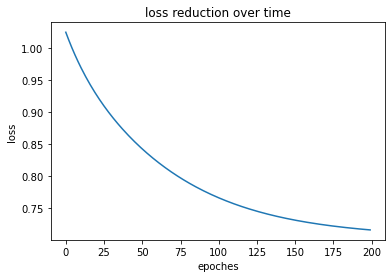

In [13]:
w, b = softmax_regression(X_train, y_train, lr = 0.01, c=2, epochs=200)

In [14]:
print(w, b)

[[0.37212629 0.61966311]
 [0.36376426 0.28096336]
 [0.18126647 0.76954342]
 [0.67886997 0.75030431]
 [1.05158623 0.64725617]
 [0.23569325 0.10944481]
 [0.82688577 0.81474124]
 [0.06701164 0.64417277]
 [0.40988375 0.47221089]
 [0.39797075 0.85202429]
 [0.24799232 0.7208472 ]
 [0.76213339 0.67264869]
 [0.53782045 0.83540169]
 [0.86240836 0.52410788]
 [0.91385375 0.72684845]
 [0.4467793  0.15379742]
 [0.66241407 0.40959886]
 [0.35059126 0.6084618 ]
 [0.97523941 0.79115018]
 [0.36495606 0.64728271]
 [0.78809829 0.61030312]
 [0.48116446 0.54178007]
 [0.90171698 0.15372135]
 [0.32400642 0.14095668]
 [0.15925631 0.6067191 ]
 [0.87381359 1.06716014]
 [0.14968939 0.17856779]
 [0.76517747 0.10493828]
 [0.14320107 0.12239222]
 [0.37398826 0.05103833]] [1.07814108 1.11041967]


In [15]:
def predict_softmax(X, w, b):

    # 预测
    z = X@w + b
    y_hat = softmax(z)

    # 返回概率最高的类别
    return np.argmax(y_hat, axis=1)


In [16]:
def accuracy_softmax(X, y, w, b):
    y_hat = predict_softmax(X, w, b)
    return np.sum(y == y_hat)/len(y)


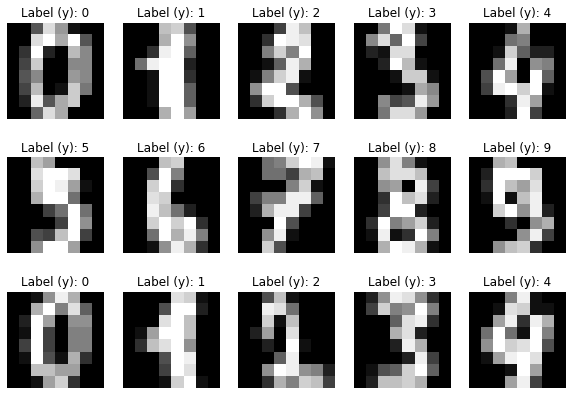

In [17]:
# Loading
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
# Plotting
fig = plt.figure(figsize=(10, 7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape(8, 8), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y[i]))
    plt.axis('off')


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Epoch 0==> Loss = 27.042555465568046
Epoch 100==> Loss = 0.8466775997520567
Epoch 200==> Loss = 0.44077679406138703


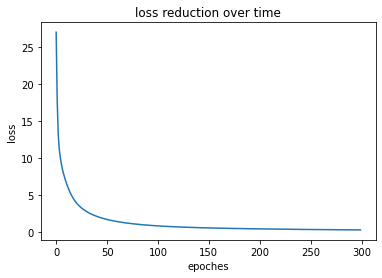

In [19]:
w, b = softmax_regression(X_train, y_train, lr=0.01, c=10, epochs=300)


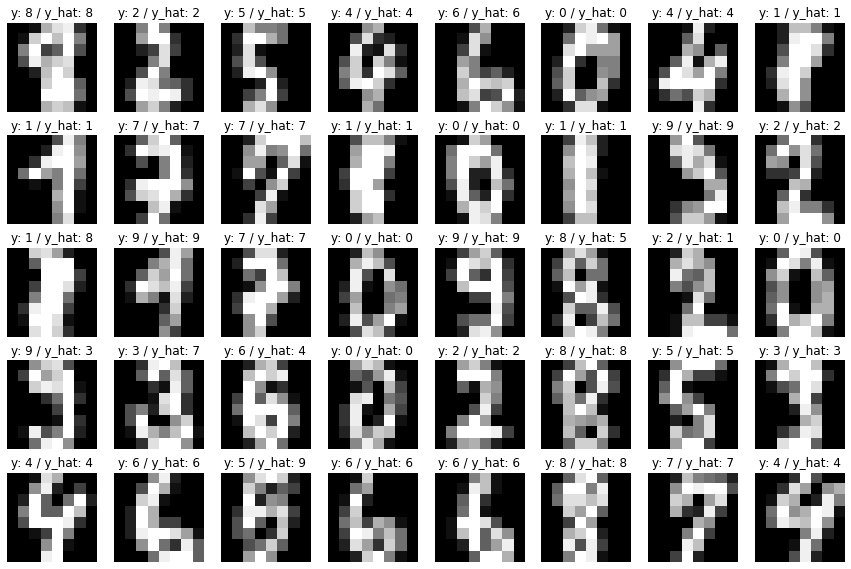

In [20]:
y_preds = predict_softmax(X_test, w, b)
fig = plt.figure(figsize=(15, 10))
for i in range(40):
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap('gray'))

    ax.set_title(f'y: {y_test[i]} / y_hat: {y_preds[i]}')
    plt.axis('off')


In [21]:
train_accuracy = accuracy_softmax(X_train, y_train, w, b)
test_accuracy = accuracy_softmax(X_test, y_test, w, b)

print(f"train accuracy: {train_accuracy}")
print(f"test accuracy: {test_accuracy}")


train accuracy: 0.9262352122477383
test accuracy: 0.8833333333333333


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,
                        multi_class='multinomial',
                        penalty='l2',
                        solver='sag',
                        max_iter=10000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [23]:
print(f"train accuracy: {lr.score(X_train, y_train)}")
print(f"test accuracy: {lr.score(X_test, y_test)}")

train accuracy: 1.0
test accuracy: 0.9666666666666667


## 实例分析(鸢尾花数据集）

### 数据集介绍

鸢尾属（学名：Iris）是一类开花植物，属于鸢尾科，其下包含260-300个种，主要分布在北非、西班牙、葡萄牙、高加索地区、黎巴嫩和以色列等。

鸢尾的学名 Iris 源于希腊语，为希腊神话中彩虹女神的名字，这可能是因为鸢尾花极其多样的色彩。鸢尾是园艺中十分受欢迎的花卉。

安德森鸢尾花卉数据集（Anderson's Iris data set），也称鸢尾花卉数据集（Iris flower data set）或费雪鸢尾花卉数据集（Fisher's Iris data set），是一种多重变量分析的数据集。它最初是埃德加·安德森（Edgar Anderson）从加拿大加斯帕半岛的鸢尾属花朵中提取的形态学变异数据，后由英国统计学家、演化生物学家与遗传学家罗纳德·艾尔默·费希尔（Ronald Aylmer Fisher，1890年2月17日－1962年7月29日）在1936年的论文《分类学问题中可使用的多种测量方法》中使用了其中收录的三种鸢尾变种，作为线性判别分析的案例。

鸢尾花卉数据集包含了150个样本，都属于鸢尾属下的3个亚属，分别是山鸢尾（setosa）、变色鸢尾（vericolor）和维吉尼亚鸢尾（virginica）。每个样本都包含4项特征，即花萼（sepal）和花瓣（petal）的长度和宽度，它们可用于样本的定量分析。基于这些特征，费雪发展了能够确定其属种的线性判别分析。


### 数据获取

最简单获取鸢尾花数据的方式，从Scikit-Learn的datasets模块获取即可：

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score


In [25]:
iris = load_iris()

In [26]:
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['class'] = iris.target
df['class'].replace([0, 1, 2], iris.target_names, inplace=True)
display(df.head())
display(df.tail())


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


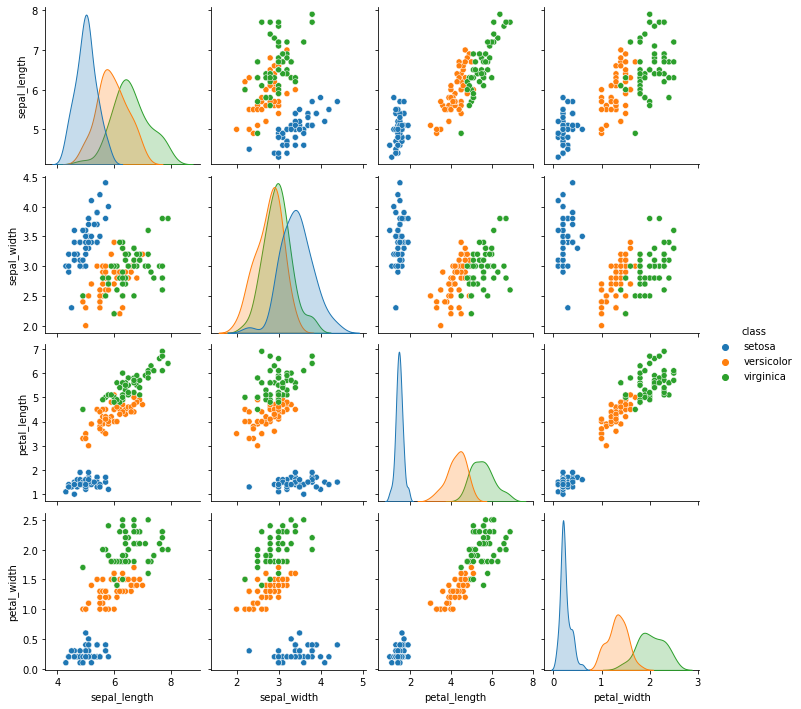

In [29]:
sns.pairplot(df, hue='class', height=2.5)

为了简单起见，这里只做二分类。取出setosa和versicolor两类数据作为测试。

In [30]:
test_df = df[df['class'] != 'virginica']

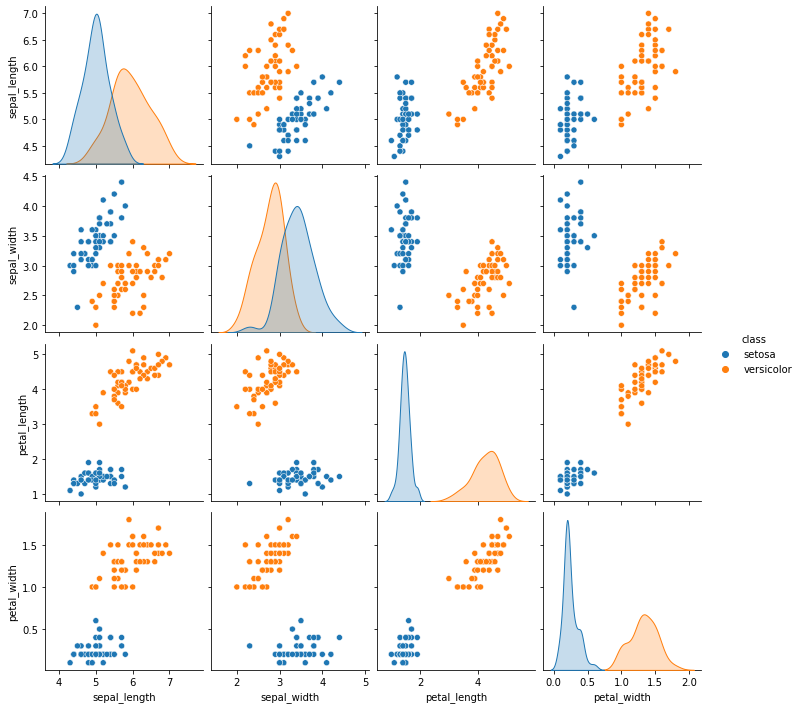

In [31]:
sns.pairplot(test_df, hue='class')

In [32]:
X = test_df.drop(test_df.columns[[1, 3, 4]], axis=1).to_numpy()
y = test_df.drop(test_df.columns[[0, 1, 2, 3]], axis=1).to_numpy()
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y.ravel())


### 分类

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y.reshape(-1, 1), test_size=0.2, random_state=22)
print('Train X Shape', X_train.shape)
print('Train y Shape', y_train.shape)


Train X Shape (80, 2)
Train y Shape (80, 1)


Epoch 0==> Loss = 0.3845478258460414
Epoch 50==> Loss = 0.15708101716519687
Epoch 100==> Loss = 0.10848608077816486
Epoch 150==> Loss = 0.08627380450907121
train accuracy: 0.9875
test accuracy: 1.0


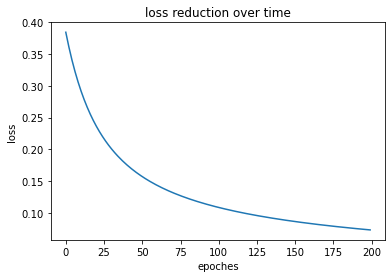

In [34]:
b, w = logistic_regression(X_train, y_train, lr=0.1, epochs=200)
train_accuracy = accuracy_logistic(X_train, y_train, w, b)
test_accuracy = accuracy_logistic(X_test, y_test, w, b)

print(f"train accuracy: {train_accuracy}")
print(f"test accuracy: {test_accuracy}")


## Sklearn

下面的例子，我们将用scikit-learn的Logistic回归进行分类。

```python
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
```

参数：

- `penalty`: 一个字符串，制定了正则化策略。
    - `'None'`, 不加入惩罚项。
    - `'l2'`，则优化目标函数为：$\frac{1}{2}\| \mathrm{w} \|_2^2 + CL(\mathrm{w})$ 。
    - `'l1'`，则优化目标函数为：$\| \mathrm{w} \|_1 + CL(\mathrm{w})$ 。
    - `'elasticnet'`，`L1` 和 `L2` 惩罚项都加入.
- `dual`：一个布尔值。
    - 如果为`True`，则求解对偶形式（只是在 `penalty='l2'` 且 `solver='liblinear'` 有对偶形式）；
    - 如果为`False`，则求解原始形式。
- `tol`：一个浮点数，指定判断迭代收敛与否的一个阈值。
- `C`：一个浮点数，它指定了惩罚系数的倒数。如果它的值越小，则正则化越大。

- `fit_intercept`：一个布尔值，是否需要 `b` 值。如果为 `False`，则不会计算b值（模型会假设你的数据已经中心化）。

- `intercept_scaling`：一个浮点数，只有当 `solver='liblinear'` 才有意义。当采用 `fit_intercept` 时，相当于人造一个特征出来，该特征恒为 `1`，其权重为 `b` 。在计算正则化项的时候，该人造特征也被考虑了。因此为了降低人造特征的影响，需要提供 `intercept_scaling`。

- `class_weight`：一个字典或者字符串`'balanced'`。

    - 如果为字典：则字典给出了每个分类的权重，如`{class_label:weight}`。
    - 如果为字符串 `'balanced'`：则每个分类的权重与该分类在样品中出现的频率成反比。
    - 如果未指定，则每个分类的权重都为 1。
- `max_iter`：一个整数，指定最大迭代数。

- `random_state`：一个整数或者一个 `RandomState`实例，或者`None`。
    - 如果为整数，则它指定了随机数生成器的种子。
    - 如果为`RandomState`实例，则指定了随机数生成器。
    - 如果为`None`，则使用默认的随机数生成器。 
- `solver`：一个字符串，指定了求解最优化问题的算法，可以为如下的值：
    - `'newton-cg'`：使用牛顿法。利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    - `'lbfgs'`：使用 `L-BFGS` 拟牛顿法。利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    - `'liblinear'` ：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
    - `'sag'`：使用 `Stochastic Average Gradient descent` 算法。随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候，SAG是一种线性收敛算法，这个速度远比SGD快。

- `multi_class`：一个字符串，指定对于多分类问题的策略，可以为如下的值：
    - `'ovr'` ：采用 one-vs-rest 策略。精度低，速度快。
    - `'multinomial'`：many-vs-many(MvM) ，直接采用多分类逻辑回归策略，其实就是`softmax regression`。精度高，速度慢。
- `verbose`：一个正数。用于开启/关闭迭代中间输出的日志。
- `warm_start`：一个布尔值。如果为 `True`，那么使用前一次训练结果继续训练，否则从头开始训练。
- `n_jobs`：一个正数。指定任务并行时的 CPU 数量。如果为 -1 则使用所有了用的 CPU。

返回值:

- `coef_`：权重向量。
- `intercept`：`b`值。
- `n_iter_`：实际迭代次数。


方法:

- `fix(X, y)`： 训练模型。
- `predict(X)`：用模型进行预测，返回预测值。
- `score(X, y)`：返回（X，y）上的预测准确率（accuracy）。
- `predict_log_proba(X)`：返回一个数组，数组的元素一次是 X 预测为各个类别的概率的对数值。 
- `predict_proba(X)`： 返回一个数组，数组元素一次是 X 预测为各个类别的概率的概率值。
- `sparsify()`：将系数矩阵转换为稀疏格式。
- `set_params(** params)`：设置此估计器的参数。
- `decision_function(X)`：预测样本的置信度分数。
- `densify()`：将系数矩阵转换为密集阵列格式。

***
注意：
- 在调参时如果我们主要的目的只是为了解决过拟合，一般 `penalty` 选择`L2`正则化就够了。但是如果选择`L2`正则化发现还是过拟合，即预测效果差的时候，就可以考虑`L1`正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用`L1`正则化。

- 对于规模小的数据集，`'liblinear'`比较适用；对于规模大的数据集，`'sag'`比较适用。

- `'newton-cg'`、`'lbfgs'`、`'sag'` 只处理`penalty='12'`的情况。
*** 

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())


LogisticRegression()

In [36]:
print (lr.intercept_, lr.coef_)

[0.38743735] [[0.71758698 3.05063165]]


In [37]:
print('Accuracy from sk-learn: {0}'.format(lr.score(X_test, y_test)))


Accuracy from sk-learn: 1.0
